# Assignment Python 1

### Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, - in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

Apa perubahan jumlah insiden kejahatan dari 2011 ke 2016?
Apa 3 kejahatan teratas per wilayah pada tahun 2016?

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # to convert image into arrays

print('Libraries are already imported!')


Libraries are already imported!


### Import DataSet

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')

print('Dataset is ready!')

Dataset is ready!


### Exploratory Data Analysis

Setelah itu, mengeksplorasi dataset untuk mendapatkan informasi di dalamnya.

Pertama, lihat 5 baris kumpulan data teratas

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Dataset london_crime_by_lsoa memiliki 7 kolom.

Setelah itu, ingin melihat 5 baris terbawah dari Dataset

In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Indeks dataset mencapai 13490603 yang berarti terdapat 13490604 baris.

Kemudian, melihat semua kolom dan tipe data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Secara default, ada 3 kolom bertipe int.

Selanjutnya, melihat header list.

In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Melihat index list

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

Melihat shape of Dataset

In [8]:
df.shape

(13490604, 7)

Dataset ini memiliki 13490604 baris dan 7 kolom, sesuai dengan yang telah dijelaskan sebelumnya.

Kemudian, melihat statistik deskriptif setiap kolom untuk jenis objek.

In [9]:
df.describe(include='O')

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


Melihat statistik deskriptif kolom tipe int.

In [10]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Periksa missing value.

In [11]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Perika duplicate data.

In [12]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool

Melihat Unique Value of each columns.

In [13]:
print('borough: ', df['borough'].unique())
print('major_category: ', df['major_category'].unique())
print('minor_category: ', df['minor_category'].unique())
print('value: ', df['value'].unique())
print('year: ', df['year'].unique())
print('month: ', df['month'].unique())

borough:  ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category:  ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category:  ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'

### Pre-processing & Visualization

Selanjutnya akan memvisualisasikan dataset, dan melakukan pre-processing data berdasarkan kasus.

### Area Plot

Pertanyaan: Wilayah mana yang memiliki tingkat kumulatif kasus kriminal tahunan dan bulanan tertinggi?

Membuat Kerangka data yang dibutuhkan

In [14]:
ap1 = df.pivot_table(index='year', columns ='borough', values='value', aggfunc=sum)
ap1

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [15]:
ap2 = df.pivot_table(index='month', columns ='borough', values='value', aggfunc=sum)
ap2

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
month,,,,,,,,,,,,,,,,,,,,,
1,12610,17550,9576,18744,15770,22288,58,22198,20398,15888,...,9595,21612,15637,7843,22776,8241,17762,16792,16402,37928
2,12193,16659,8959,17535,14684,21332,56,19986,19629,15667,...,9067,20462,14521,7315,21518,8043,16958,15673,15902,34713
3,13451,18447,10133,19296,15843,24027,49,22015,21401,16966,...,9929,22749,16282,8279,23301,8970,18988,17396,17370,38349
4,12323,17421,9179,18026,14714,22305,53,20954,20416,15731,...,9372,20887,14574,7905,22248,8498,18322,16748,16464,35934
5,12844,17999,9903,19718,15785,24181,61,22169,22067,16680,...,10036,21901,15359,8819,24127,8669,19821,17669,17690,37661
6,12451,17908,9492,19342,15159,23514,52,22376,21753,16683,...,9915,21967,15195,8375,24205,8822,19848,17962,17687,37216
7,13205,18297,9805,19698,16164,24133,53,22629,22557,16628,...,10205,22758,15517,8498,24553,8557,21406,17927,18387,40293
8,12315,16775,9063,18478,14703,21900,75,21623,20806,15445,...,9259,21683,14410,7911,23847,7933,19589,16939,16765,38090
9,11883,16902,9053,18184,14616,21731,90,21255,20249,15447,...,9274,21345,14725,8231,22926,8050,19040,16619,17306,35608


Memastikan tidak ada nilai yang hilang dalam kerangka data

In [16]:
ap1.isnull().sum()

borough
Barking and Dagenham      0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
City of London            0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith and Fulham    0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington and Chelsea    0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
dtype: int64

In [17]:
ap2.isnull().sum()

borough
Barking and Dagenham      0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
City of London            0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith and Fulham    0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington and Chelsea    0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
dtype: int64

Membuat Area Plots

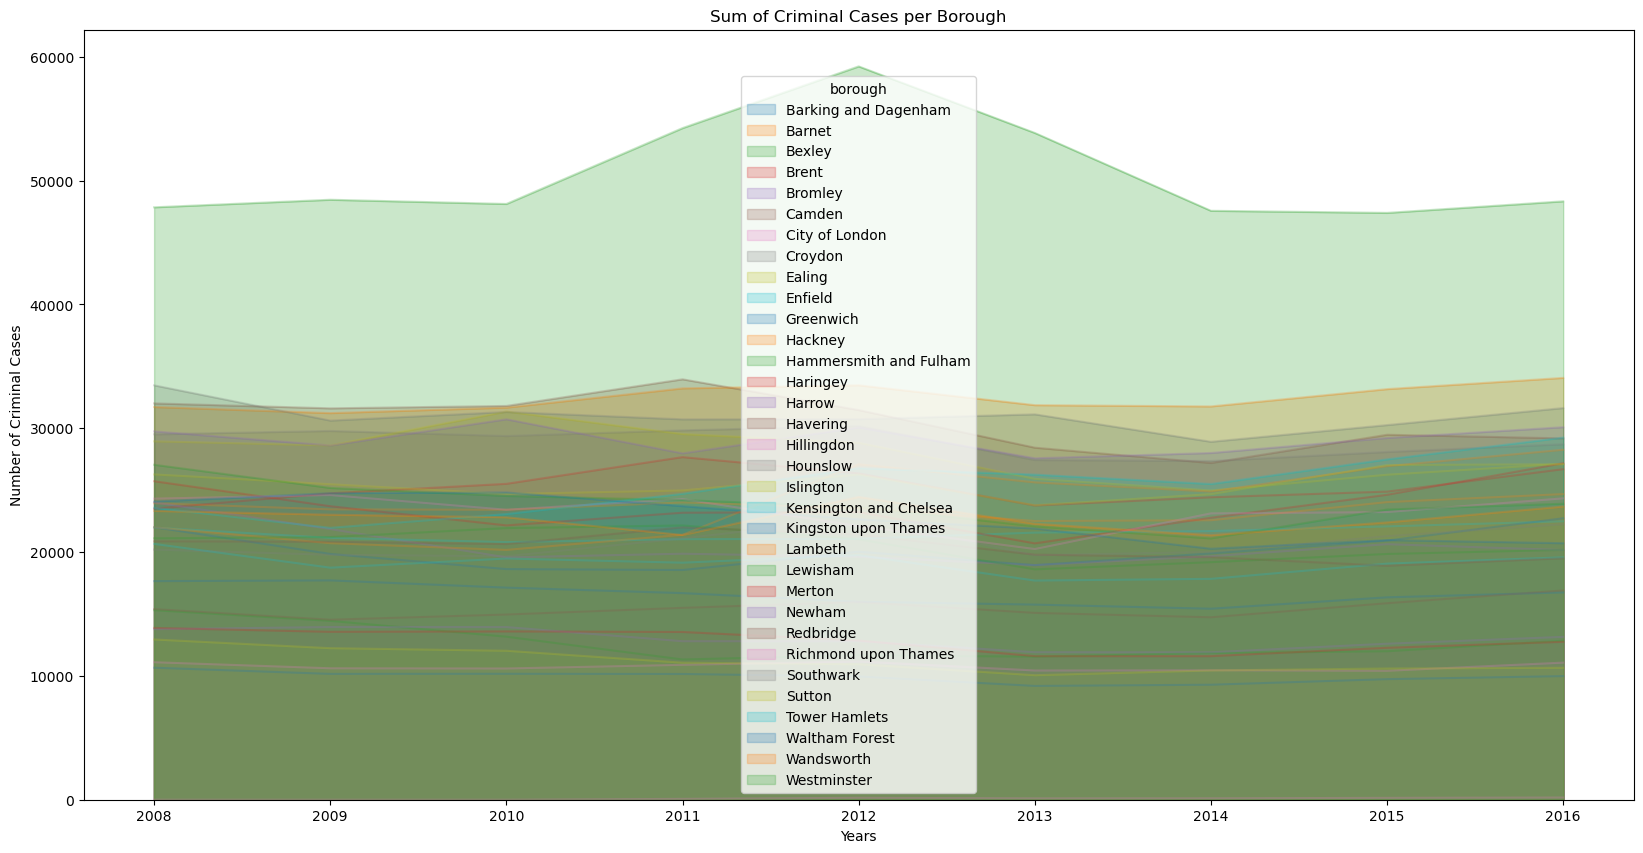

In [18]:
ap1.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10)
        )

plt.title('Sum of Criminal Cases per Borough')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Years')

plt.show()

Jawaban: Dari plot wilayah di atas, kita dapat menyimpulkan bahwa Westminster merupakan kota dengan tingkat kumulatif kasus pidana tahunan tertinggi dan terdapat peningkatan kasus yang signifikan pada tahun 2012.

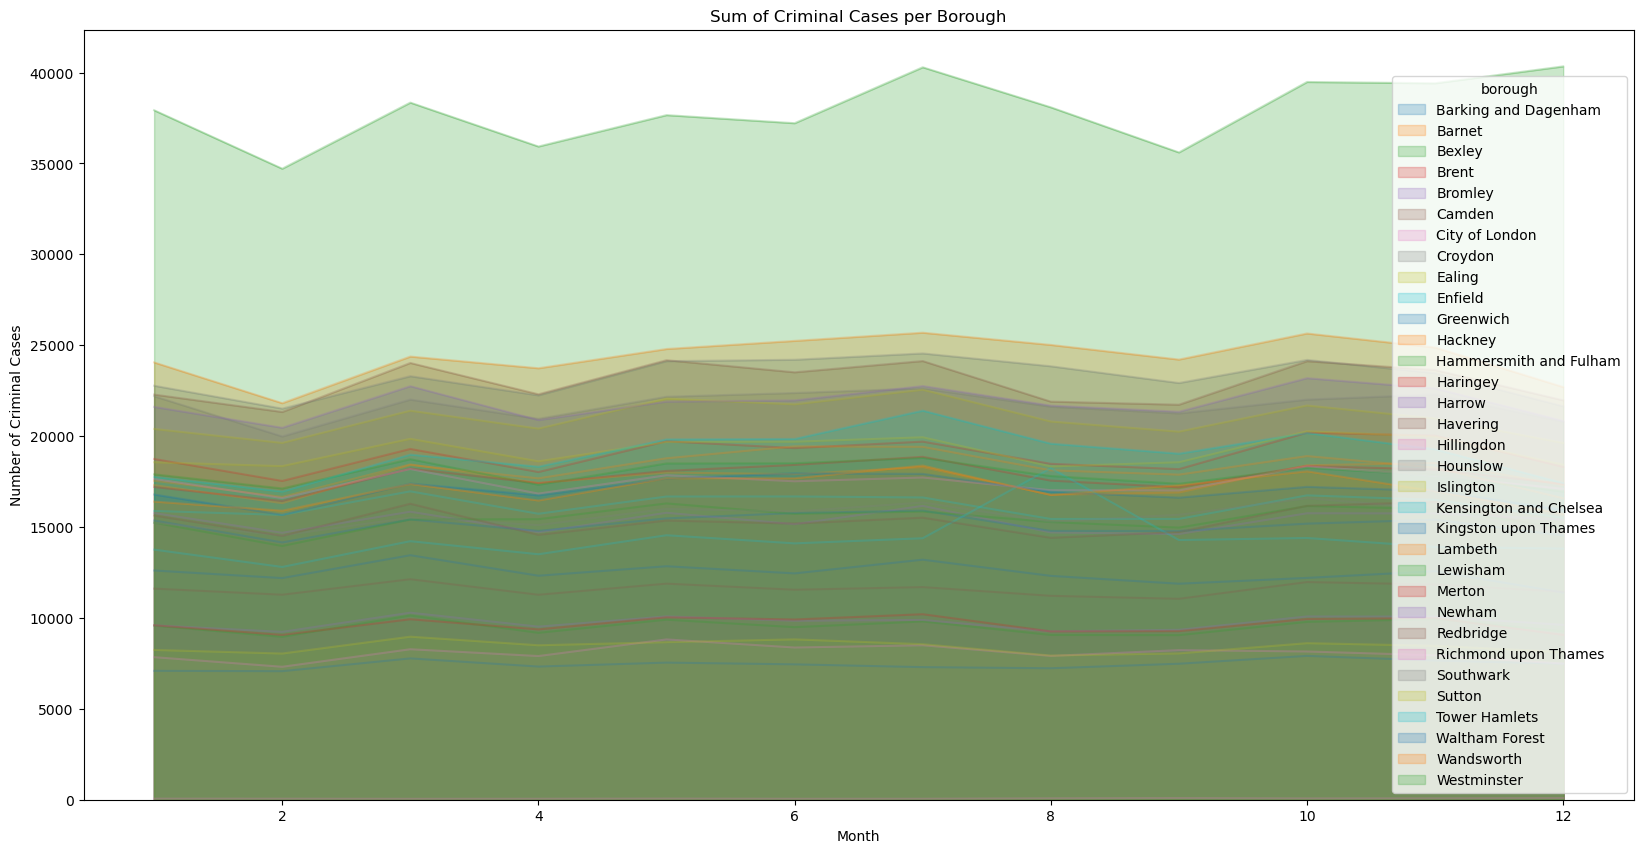

In [19]:
ap2.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Sum of Criminal Cases per Borough')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Month')

plt.show()

Informasi: Dari Area Plot di atas, kita dapat menyimpulkan bahwa Westminster merupakan kota dengan tingkat kumulatif kasus kriminal bulanan tertinggi.

### Histogram

Pertanyaan: Berapa distribusi frekuensi 3 kasus kriminal nomor teratas dari wilayah London pada 2008-2013?

Membuat Kerangka data yang dibutuhkan

In [20]:
ht1 = df[df['year'] <= 2013]
ht1

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


Memproses kumpulan data terlebih dahulu sehingga memiliki 3 wilayah teratas yang memiliki kasus kriminal tertinggi.

In [21]:
ht1 = ht1.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3

borough,Westminster,Lambeth,Camden
year,,,
2008,47846,31717,32010
2009,48456,31225,31612
2010,48116,31671,31804
2011,54243,33224,33956
2012,59226,33473,31472
2013,53852,31868,28435


Membuat Histogram

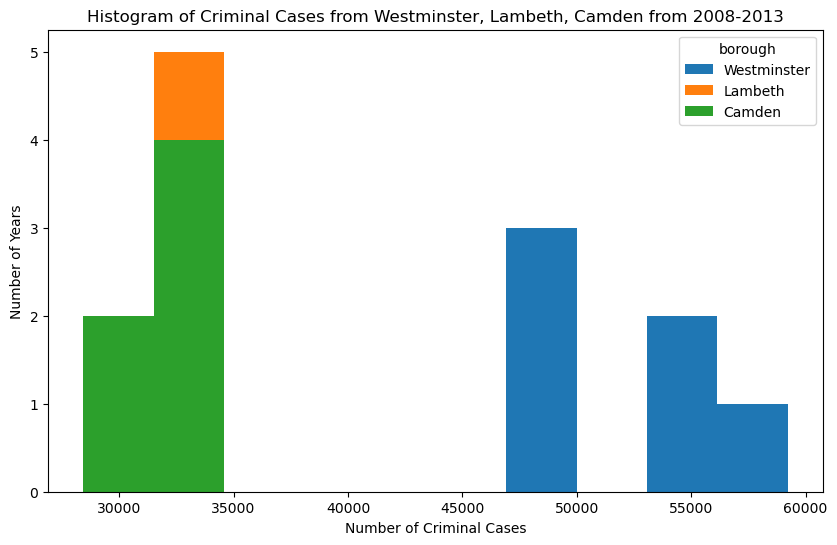

In [22]:
ht1_top3.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

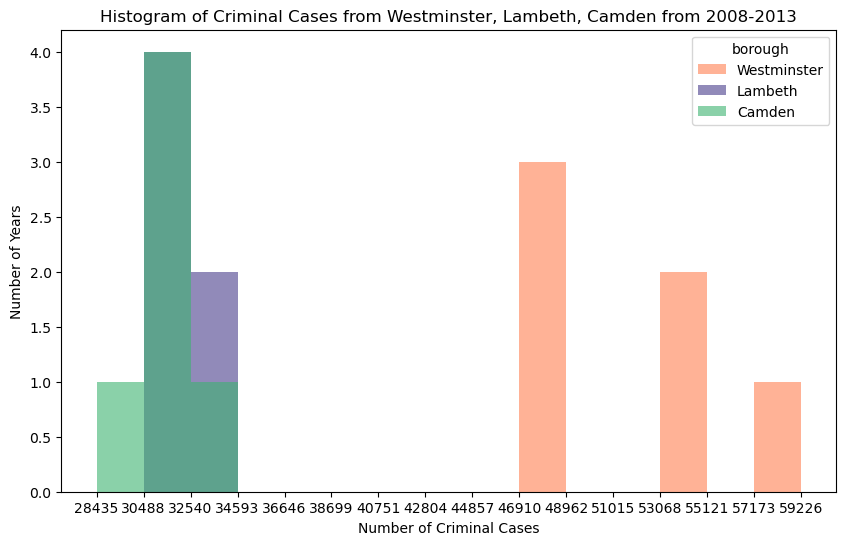

In [23]:
# let's get the x-tick values
count, bin_edges = np.histogram(ht1_top3, 15)

# un-stacked histogram
ht1_top3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

Jawaban: Dari histogram di atas dapat disimpulkan bahwa distribusi frekuensi kasus pidana di Westminster cenderung menyebar dibandingkan Lambeth dan Camden.

### Bar Chart

Pertanyaan: Buat plot batang horizontal yang menunjukkan 10 besar dari total kasus kriminal di London untuk periode 2008 - 2016.|

Membuat Kerangka data yang dibutuhkan

In [24]:
bc1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
bc1['Total'] = bc1.sum(axis=1)
bc1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
bc1_top10 = bc1['Total'].head(n=10)
bc1_top10

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: Total, dtype: int64

Membuat Horizontal Bar Plot

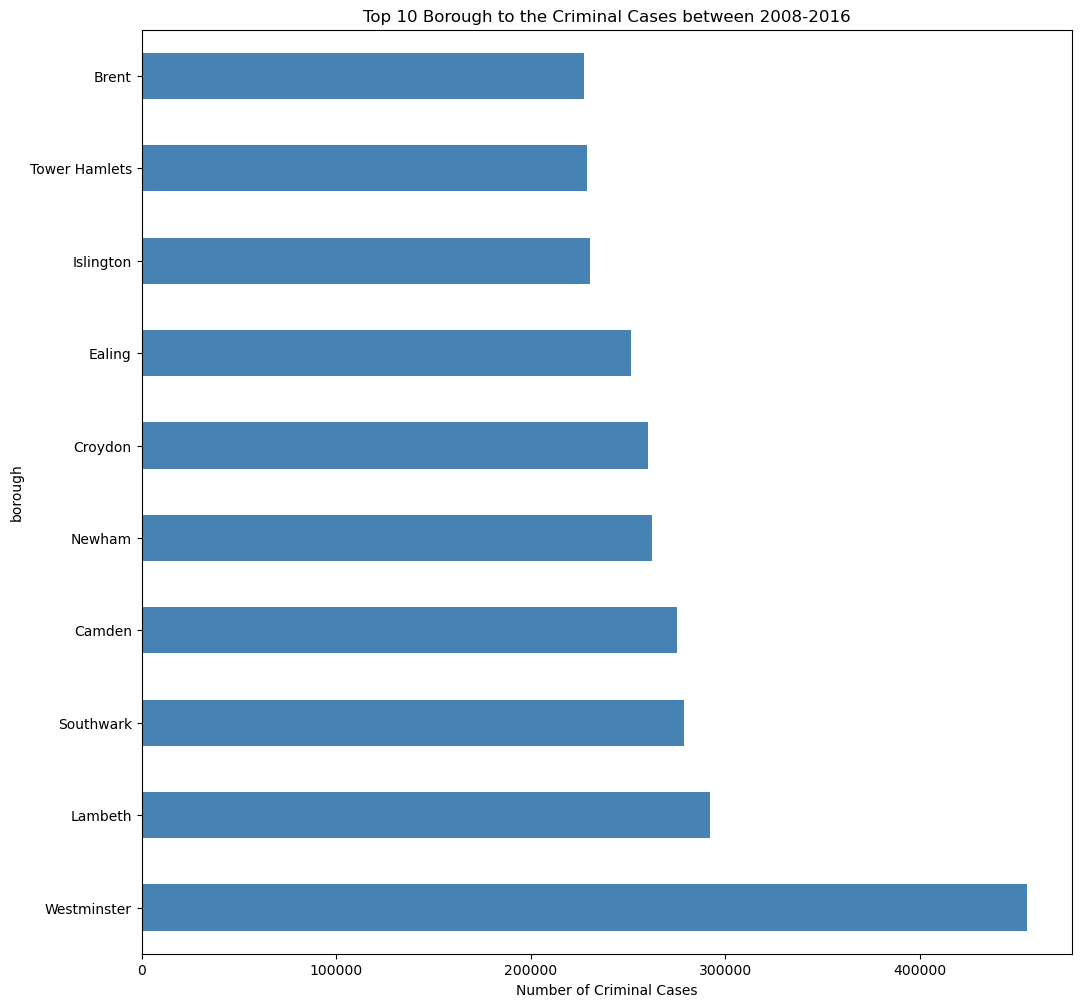

In [25]:
bc1_top10.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Criminal Cases')
plt.title('Top 10 Borough to the Criminal Cases between 2008-2016')

plt.show()

Jawaban: Dari diagram batang horizontal di atas, kita mengetahui bahwa Westminster memiliki total kasus kriminal tertinggi, dan diikuti oleh Lambeth, Southwark, Camden, Newham, Croydon, Ealing, Islington, Tower Hamlets, Brent sebagai 10 besar dari total kasus kriminal

### Pie Chart

Pertanyaan: Bagaimana persentase kategori kriminal besar dan kecil yang terjadi di London?

Membuat Kerangka data yang dibutuhkan.

In [26]:
pc1 = df['major_category'].value_counts()

In [27]:
pc2 = df['minor_category'].value_counts()

Membuat Pie Chart

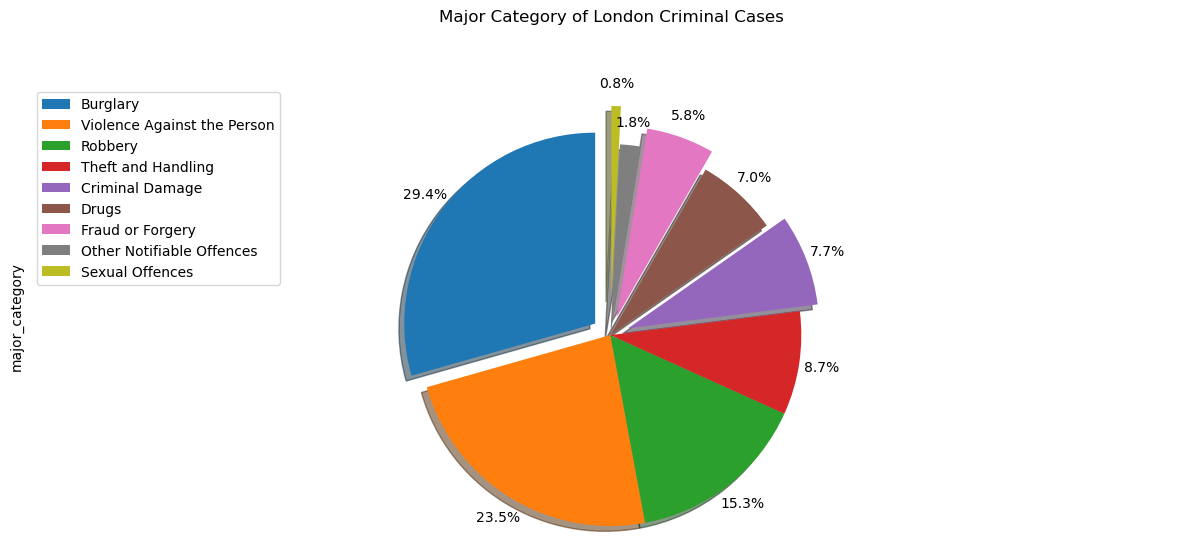

In [28]:
explode_list = [0.1, 0, 0, 0, 0.1, 0, 0.1, 0, 0.2] # ratio for each continent with which to offset each wedge.

pc1.plot(kind='pie',
         figsize=(15, 6),
         autopct='%1.1f%%', 
         startangle=90,    
         shadow=True,       
         labels=None,         # turn off labels on pie chart
         pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
         explode=explode_list # 'explode' lowest 3 continents
         )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df['major_category'].unique(), loc='upper left') 

plt.show()

Jawaban: Dari diagram lingkaran di atas, kita mengetahui bahwa Perampokan adalah kategori yang paling sering muncul sebagai kategori besar dengan persentase 29,4%, sedangkan kekerasan seksual kategori paling kecil dengan persentase 0,8%.

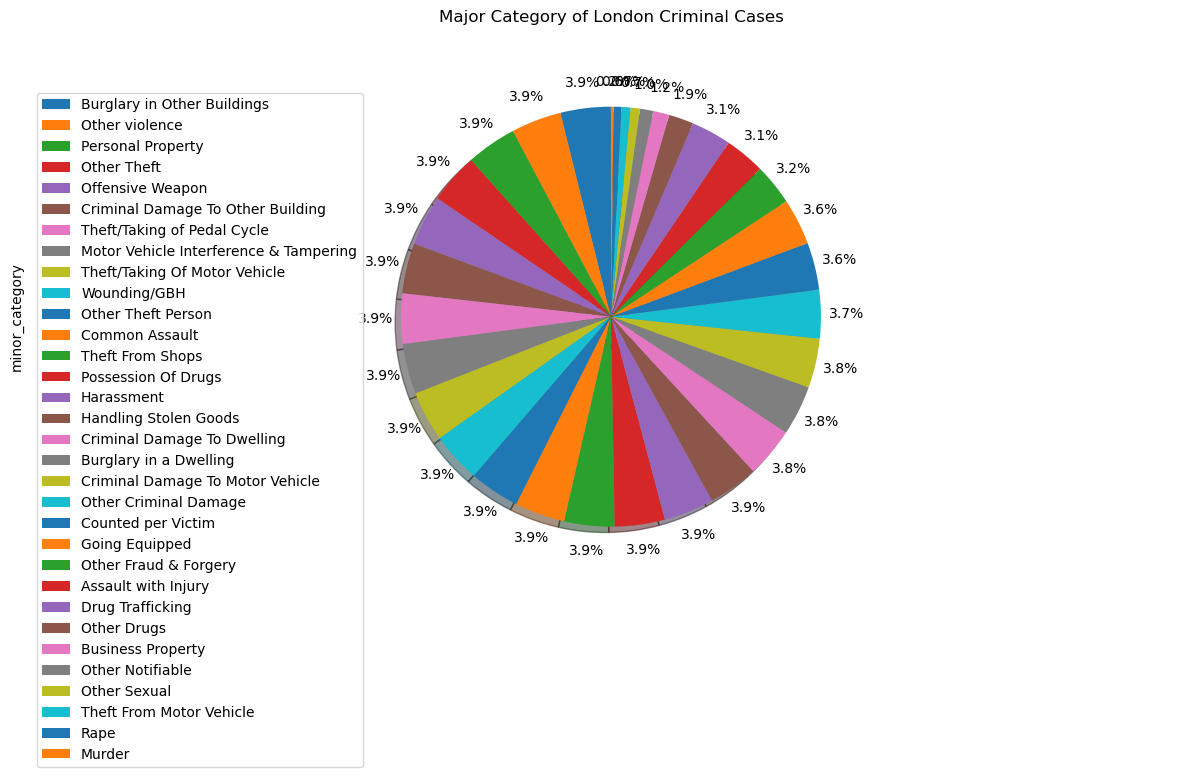

In [29]:
pc2.plot(kind='pie',
         figsize=(15, 6),
         autopct='%1.1f%%', 
         startangle=90,    
         shadow=True,       
         labels=None,         # turn off labels on pie chart
         pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
         )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df['minor_category'].unique(), loc='upper left') 

plt.show()

Informasi: Dari diagram lingkaran di atas, kita mengetahui bahwa sebagian besar kategori minor muncul dalam persentase yang sama.

### Box Plot

Pertanyaan: Buat box plot untuk memvisualisasikan distribusi total kasus kriminal di setiap tahun Borough.

Membuat Kerangka data yang dibutuhkan.

In [30]:
bp1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
bp1.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Membuat Horizontal Box Plot

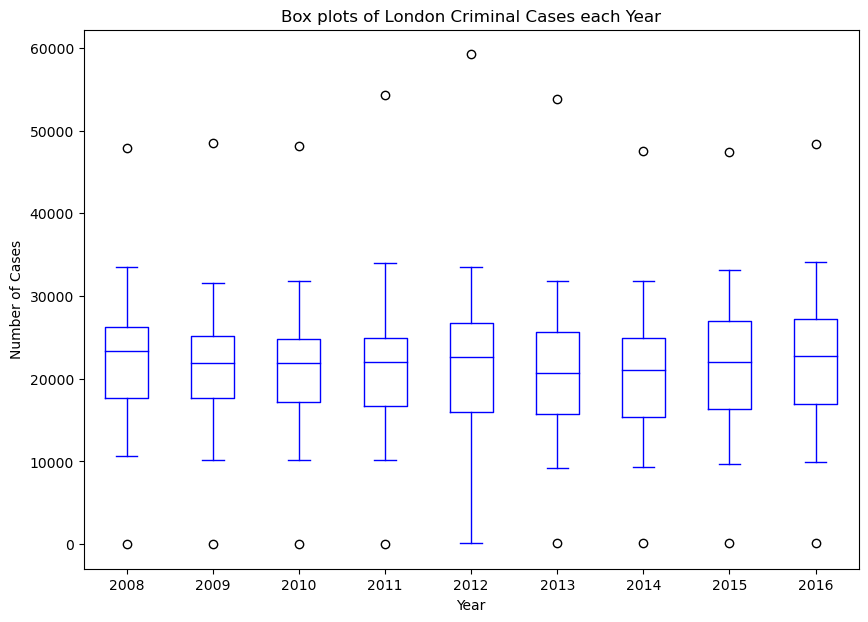

In [31]:
bp1.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Box plots of London Criminal Cases each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Jawaban: Dari box plot di atas terlihat bahwa sebaran jumlah kasus pidana cenderung sama setiap tahunnya, namun pada tahun 2012 memiliki sebaran yang cenderung lebih luas. Terdapat outlier pada rentang box plot atas dan bawah, yaitu adanya wilayah dengan 0 kasus dan terdapat juga wilayah yang memiliki kasus sangat tinggi setiap tahunnya.

### Scatter Plot

Pertanyaan: Buat Scatter Plot dari total kasus kriminal London pada periode 2008-2016

Membuat Kerangka data yang dibutuhkan.

In [32]:
sp1 = df.pivot_table(index='year', columns='borough', values='value', aggfunc=sum)
sp1['Total'] = sp1.sum(axis=1)
sp11 = sp1[['Total']]
sp11.reset_index(inplace=True)
sp11

borough,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Memastikan kolom Total sudah benar.

In [33]:
print('Total: ',sp1.Total.sum())
print('Value: ',df.value.sum())

Total:  6447758
Value:  6447758


Membuat a scatter plot

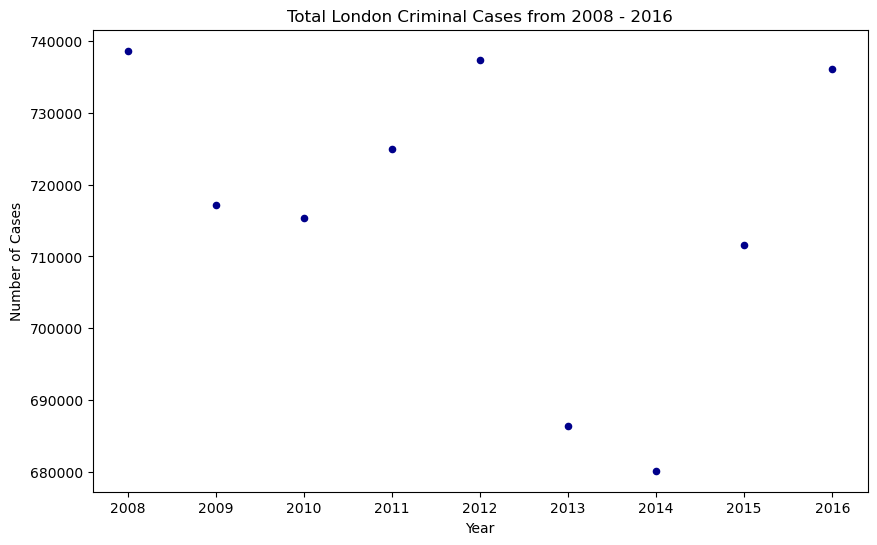

In [34]:
sp11.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total London Criminal Cases from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Jawaban: Dari scatter plot di atas, kita dapat menyimpulkan bahwa perbedaan antar tahun tidak terlalu signifikan.

### Word Clouds

Pertanyaan: Kata-kata apa dari kategori utama yang sering muncul dalam kasus kriminal di London?

Membuat List.

In [35]:
wc1 = df['major_category']

Selanjutnya akan memvisualisasikan Word Clouds dengan mask, sebelum menjalankan kode di bawah ini, ambil file dan letakkan di folder yang sama.

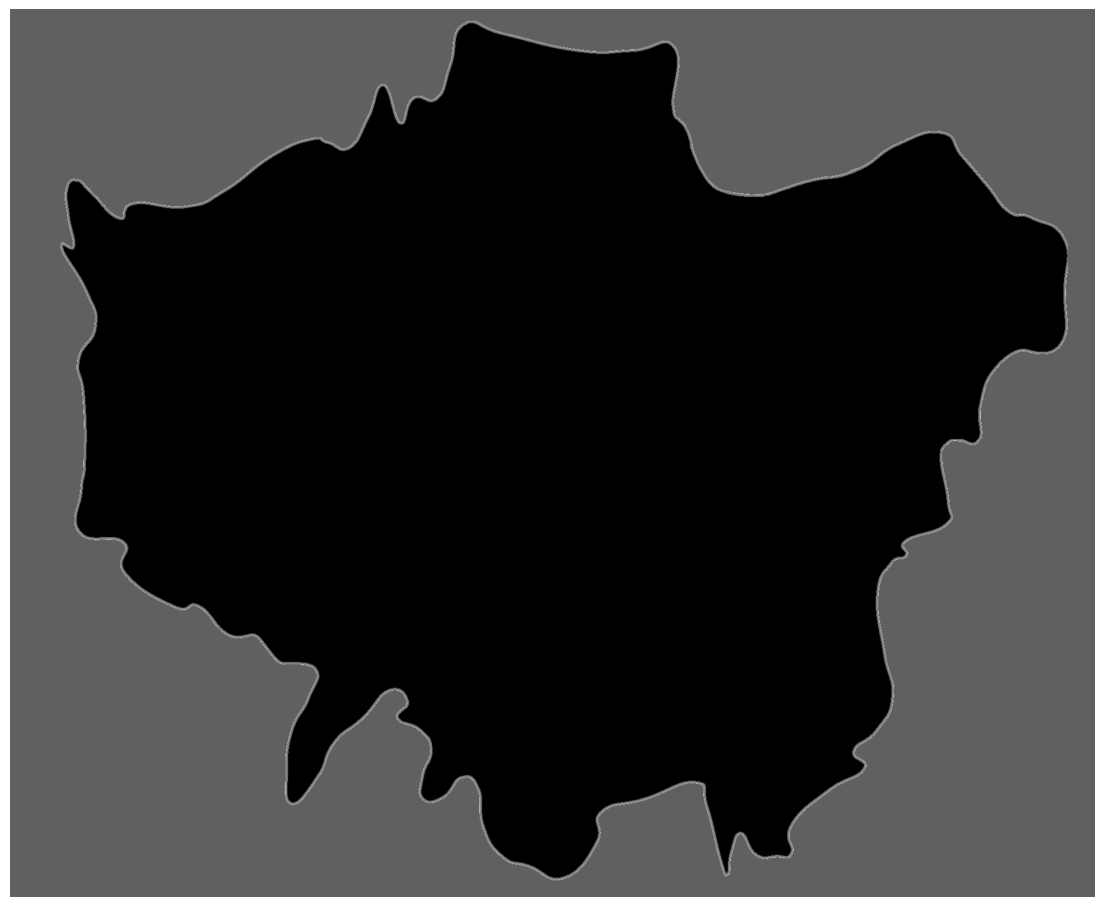

In [36]:
london_mask = np.array(Image.open('londonmask.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
stopwords = set(STOPWORDS)

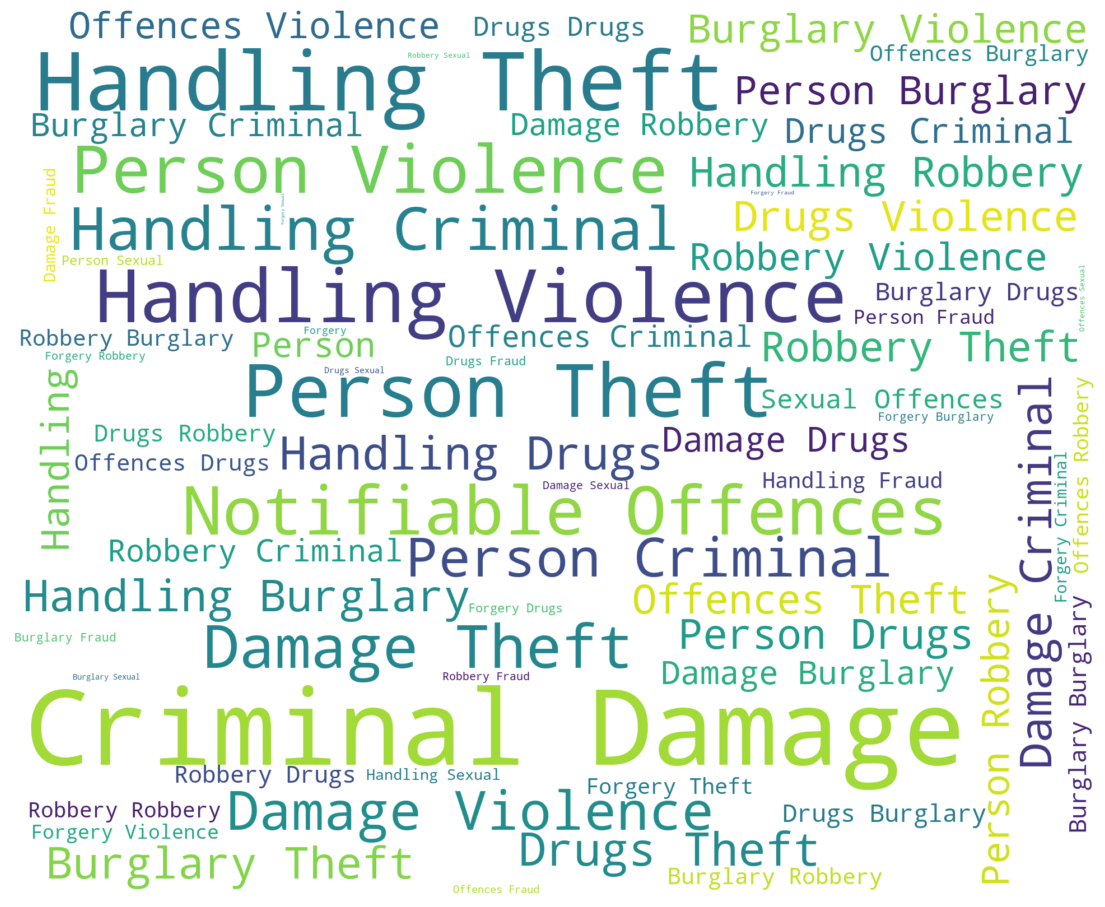

In [38]:
# instantiate a word cloud object
london_wc = WordCloud(background_color='white', mask=london_mask, stopwords=stopwords)

# generate the word cloud
london_wc.generate(' '.join(wc1.values))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jawaban: Dari Word clouds di atas, kita mengetahui bahwa Criminal, Damage, Handling, and Theft memiliki ukuran font yang paling besar, artinya kata-kata tersebut sering muncul dalam kasus pidana kategori besar.

### Folium Maps

Question: Create a Folium Map of 

Membuat peta dunia yang berpusat di sekitar London dengan tingkat zoom 9

In [39]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=9)

world_map

Membuat peta Stamen Toner dunia yang berpusat di sekitar London.

In [40]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Toner')

world_map

Membuat peta Stamen Terrain yang berpusat di sekitar London.

In [41]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Terrain')

world_map

Jawaban: Dari peta folium di atas, kita dapat mengetahui visualisasi letak geografis London.

### Overall Analysis

Berdasarkan visualisasi data yang telah dilakukan pada data kasus kriminal di London tahun 2008-2013 diperoleh informasi bahwa terdapat berbagai kasus kriminal dengan berbagai kategori yang terjadi di London. Kasus yang paling sering adalah Perampokan dan Westminster menjadi wilayah dengan kasus terbanyak.